In [2]:
import pandas as pd
import matplotlib.pyplot as plt

lappis_data = pd.read_csv('../data/contributors_summary_lappis.csv')
eps_data = pd.read_csv('../data/contributors_summary_eps_mds.csv')

display(lappis_data.head(), eps_data.head())

,user,contributions,repositories,primary_language,monthly_contributions,contribution_types
0,hugorochaffs,342,41,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 253, 'pull_requests': 49, 'issues'..."
1,kunifu,1279,7,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 20, 'pull_requests': 13, 'issues':..."
2,Victor-oss,397,31,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 258, 'pull_requests': 51, 'issues'..."
3,rodmaia,242,2,JavaScript,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 7, 'pull_requests': 16, 'issues': ..."
4,cmckni3,2436,219,JavaScript,"{'2017-01': 30, '2017-02': 34, '2017-03': 18, ...","{'commits': 1266, 'pull_requests': 182, 'issue..."


,user,contributions,repositories,primary_language,monthly_contributions,contribution_types
0,StrangeUnit28,552,16,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 410, 'pull_requests': 43, 'issues'..."
1,owen2,1228,15,C#,"{'2017-01': 0, '2017-02': 2, '2017-03': 1, '20...","{'commits': 64, 'pull_requests': 2, 'issues': ..."
2,belyalov,2101,30,Go,"{'2017-01': 1, '2017-02': 0, '2017-03': 0, '20...","{'commits': 515, 'pull_requests': 44, 'issues'..."
3,ronanmu,99,8,Python,"{'2017-01': 0, '2017-02': 2, '2017-03': 0, '20...","{'commits': 31, 'pull_requests': 8, 'issues': ..."
4,italovinicius18,1126,74,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 731, 'pull_requests': 100, 'issues..."


In [3]:
lappis_summary = lappis_data.describe()

eps_summary = eps_data.describe()

display(lappis_summary, eps_summary)

,contributions,repositories
count,714.000000,714.00000
mean,3758.656863,54.07563
std,19087.678122,128.58169
min,0.000000,1.00000
25%,301.250000,17.00000
50%,1028.500000,34.00000
75%,3145.250000,60.00000
max,462122.000000,2300.00000


,contributions,repositories
count,6254.000000,6254.000000
mean,2344.217141,52.418612
std,5376.626238,91.790838
min,0.000000,0.000000
25%,158.000000,14.000000
50%,650.000000,31.000000
75%,2358.000000,61.000000
max,167547.000000,4241.000000


In [4]:
import pandas as pd
import json

def safe_loads(s):
    try:
        return json.loads(s.replace("'", '"'))
    except:
        return s

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

def prepare_data(df):
    df['contribution_types'] = df['contribution_types'].apply(safe_loads)
    
    df_types = pd.json_normalize(df['contribution_types'])
    for col in df_types.columns:
        df[col] = df_types[col]
    
    return df

def remove_specified_outliers(df, columns):
    for col in columns:
        df = remove_outliers(df, col)
    return df

columns_to_filter = ['contributions', 'repositories', 'commits', 'pull_requests', 'issues', 'reviews']

lappis_data = prepare_data(lappis_data)
eps_data = prepare_data(eps_data)

lappis_filtered = remove_specified_outliers(lappis_data, columns_to_filter)
eps_filtered = remove_specified_outliers(eps_data, columns_to_filter)

display(lappis_filtered.describe(), eps_filtered.describe())


,contributions,repositories,commits,pull_requests,issues,reviews
count,433.000000,433.000000,433.000000,433.000000,433.000000,433.000000
mean,994.720554,29.752887,299.217090,24.662818,20.505774,5.057737
std,1361.470263,23.138500,323.756022,26.004931,24.019294,7.989223
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,113.000000,11.000000,41.000000,5.000000,2.000000,0.000000
50%,442.000000,25.000000,192.000000,15.000000,10.000000,1.000000
75%,1238.000000,41.000000,440.000000,34.000000,32.000000,7.000000
max,7308.000000,109.000000,1665.000000,117.000000,107.000000,32.000000


,contributions,repositories,commits,pull_requests,issues,reviews
count,3447.000000,3447.000000,3447.000000,3447.000000,3447.000000,3447.000000
mean,516.950682,24.155207,185.633885,25.877575,14.483899,4.132869
std,852.175992,20.999433,234.927490,27.625702,16.387243,6.371211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,9.000000,22.000000,7.000000,2.000000,0.000000
50%,203.000000,18.000000,92.000000,17.000000,8.000000,1.000000
75%,546.500000,33.000000,260.000000,35.000000,21.000000,5.000000
max,5649.000000,113.000000,1250.000000,162.000000,73.000000,27.000000


In [5]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df, column):
    scaler = MinMaxScaler()
    df[column + '_normalized'] = scaler.fit_transform(df[[column]])
    return df

lappis_normalized = normalize_data(lappis_filtered, 'contributions')
eps_normalized = normalize_data(eps_filtered, 'contributions')

display(lappis_normalized.head(), eps_normalized.head())


,user,contributions,repositories,primary_language,monthly_contributions,contribution_types,commits,pull_requests,issues,reviews,contributions_normalized
0,hugorochaffs,342,41,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 253, 'pull_requests': 49, 'issues'...",253,49,3,7,0.046798
1,kunifu,1279,7,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 20, 'pull_requests': 13, 'issues':...",20,13,3,0,0.175014
2,Victor-oss,397,31,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 258, 'pull_requests': 51, 'issues'...",258,51,55,8,0.054324
5,dhpollack,5782,66,Python,"{'2017-01': 0, '2017-02': 1, '2017-03': 2, '20...","{'commits': 473, 'pull_requests': 95, 'issues'...",473,95,51,12,0.791188
8,douglasffcastro,2036,27,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 1245, 'pull_requests': 91, 'issues...",1245,91,100,15,0.278599


,user,contributions,repositories,primary_language,monthly_contributions,contribution_types,commits,pull_requests,issues,reviews,contributions_normalized
1,owen2,1228,15,C#,"{'2017-01': 0, '2017-02': 2, '2017-03': 1, '20...","{'commits': 64, 'pull_requests': 2, 'issues': ...",64.0,2.0,6.0,6.0,0.217384
2,belyalov,2101,30,Go,"{'2017-01': 1, '2017-02': 0, '2017-03': 0, '20...","{'commits': 515, 'pull_requests': 44, 'issues'...",515.0,44.0,22.0,20.0,0.371924
3,ronanmu,99,8,Python,"{'2017-01': 0, '2017-02': 2, '2017-03': 0, '20...","{'commits': 31, 'pull_requests': 8, 'issues': ...",31.0,8.0,0.0,0.0,0.017525
4,italovinicius18,1126,74,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 731, 'pull_requests': 100, 'issues...",731.0,100.0,70.0,26.0,0.199327
8,a15filba,128,2,JavaScript,"{'2017-01': 0, '2017-02': 0, '2017-03': 5, '20...","{'commits': 78, 'pull_requests': 22, 'issues':...",78.0,22.0,3.0,23.0,0.022659


In [6]:
lappis_count = lappis_normalized.shape[0]
eps_count = eps_normalized.shape[0]

if eps_count > lappis_count:
    eps_balanced = eps_normalized.sample(n=lappis_count, random_state=42)
else:
    eps_balanced = eps_normalized

print(f"Lappis users: {lappis_count}, EPS users after undersampling: {eps_balanced.shape[0]}")

display(lappis_normalized.head(), eps_balanced.head())


Lappis users: 433, EPS users after undersampling: 433


,user,contributions,repositories,primary_language,monthly_contributions,contribution_types,commits,pull_requests,issues,reviews,contributions_normalized
0,hugorochaffs,342,41,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 253, 'pull_requests': 49, 'issues'...",253,49,3,7,0.046798
1,kunifu,1279,7,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 20, 'pull_requests': 13, 'issues':...",20,13,3,0,0.175014
2,Victor-oss,397,31,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 258, 'pull_requests': 51, 'issues'...",258,51,55,8,0.054324
5,dhpollack,5782,66,Python,"{'2017-01': 0, '2017-02': 1, '2017-03': 2, '20...","{'commits': 473, 'pull_requests': 95, 'issues'...",473,95,51,12,0.791188
8,douglasffcastro,2036,27,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 1245, 'pull_requests': 91, 'issues...",1245,91,100,15,0.278599


,user,contributions,repositories,primary_language,monthly_contributions,contribution_types,commits,pull_requests,issues,reviews,contributions_normalized
815,TalesRG,258,12,TypeScript,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 206, 'pull_requests': 42, 'issues'...",206.0,42.0,2.0,0.0,0.045672
92,Mryck,145,13,Python,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 58, 'pull_requests': 58, 'issues':...",58.0,58.0,13.0,3.0,0.025668
1434,ShaneQi,4683,84,Swift,"{'2017-01': 129, '2017-02': 156, '2017-03': 14...","{'commits': 830, 'pull_requests': 28, 'issues'...",830.0,28.0,24.0,6.0,0.828996
4461,Liopun,440,0,NaN,"{'2017-01': 0, '2017-02': 0, '2017-03': 0, '20...","{'commits': 156, 'pull_requests': 3, 'issues':...",156.0,3.0,1.0,0.0,0.077890
2613,jvanderneutstulen,101,50,Python,"{'2017-01': 2, '2017-02': 0, '2017-03': 0, '20...","{'commits': 35, 'pull_requests': 20, 'issues':...",35.0,20.0,2.0,2.0,0.017879


In [7]:
def compute_statistics(df):
    
    stats = {
        'Number of Students': len(df),
        'Average Contributions': df['contributions'].mean(),
        'Maximum Contributions': df['contributions'].max(),
        'Average Number of Repositories': df['repositories'].mean(),
        'Maximum Number of Repositories': df['repositories'].max()
    }
    return stats

lappis_stats = compute_statistics(lappis_normalized) 
eps_stats = compute_statistics(eps_balanced)

stats_df = pd.DataFrame([eps_stats, lappis_stats], index=['Regular Students', 'Laboratory Students'])

display(stats_df)


,Number of Students,Average Contributions,Maximum Contributions,Average Number of Repositories,Maximum Number of Repositories
Regular Students,433,589.300231,5420,24.565820,109
Laboratory Students,433,994.720554,7308,29.752887,109


In [8]:
import pandas as pd
import json

def safe_loads(s):
    try:
        return json.loads(s.replace("'", '"'))
    except:
        return s

def compute_statistics(df):
    stats = {
        'Number of Students': len(df),
        'Average Contributions': df['contributions'].mean(),
        'Average Number of Repositories': df['repositories'].mean(),
    }
    return stats

def compute_extended_statistics(df):
    df['monthly_contributions'] = df['monthly_contributions'].apply(safe_loads)
    df['contribution_types'] = df['contribution_types'].apply(safe_loads)

    common_language = df['primary_language'].mode()[0]
    unique_languages = df['primary_language'].nunique()

    monthly_average = df['monthly_contributions'].apply(
        lambda x: sum(x.values()) / len(x) if len(x) > 0 else 0).mean()

    df_types = pd.DataFrame(list(df['contribution_types']))
    type_averages = df_types.mean().to_dict()

    stats = {
        'Most Common Language': common_language,
        'Number of Unique Languages': unique_languages,
        'Average Monthly Contributions': monthly_average,
        'Average Commits': type_averages.get('commits', 0),
        'Average Pull Requests': type_averages.get('pull_requests', 0),
        'Average Issues': type_averages.get('issues', 0),
        'Average Reviews': type_averages.get('reviews', 0)
    }
    return stats

lappis_basic_stats = compute_statistics(lappis_normalized)
eps_basic_stats = compute_statistics(eps_balanced)

lappis_extended_stats = compute_extended_statistics(lappis_normalized)
eps_extended_stats = compute_extended_statistics(eps_balanced)

lappis_stats = {**lappis_basic_stats, **lappis_extended_stats}
eps_stats = {**eps_basic_stats, **eps_extended_stats}

stats_df = pd.DataFrame([eps_stats, lappis_stats], index=['Regular Students', 'Laboratory Students'])

display(stats_df)


,Number of Students,Average Contributions,Average Number of Repositories,Most Common Language,Number of Unique Languages,Average Monthly Contributions,Average Commits,Average Pull Requests,Average Issues,Average Reviews
Regular Students,433,589.300231,24.565820,Python,26,6.360414,178.30485,26.025404,14.847575,4.364896
Laboratory Students,433,994.720554,29.752887,Python,27,10.695920,299.21709,24.662818,20.505774,5.057737


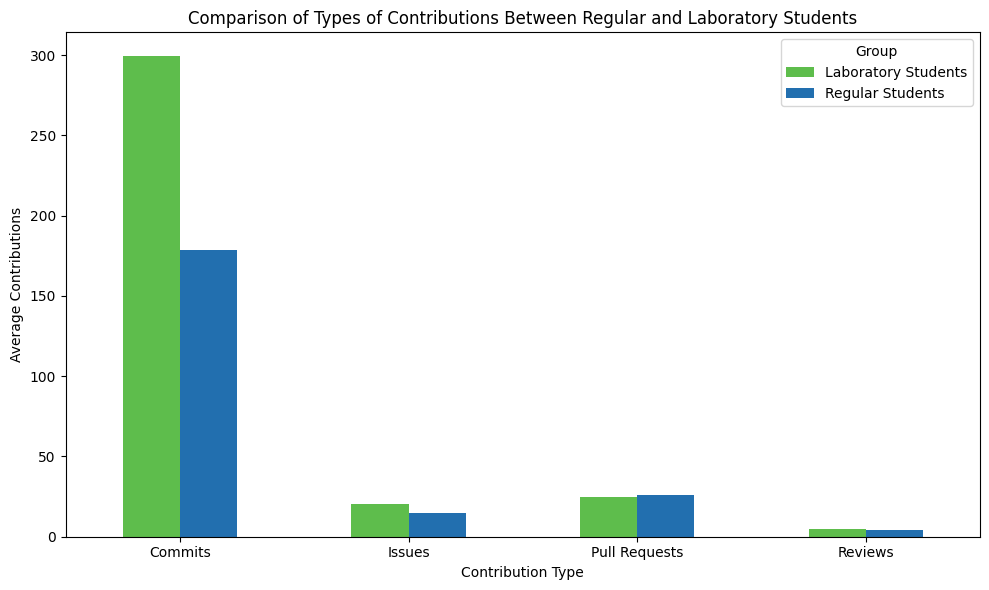

<Figure size 640x480 with 0 Axes>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

lappis_contribution_types = {
    'Commits': lappis_extended_stats['Average Commits'],
    'Pull Requests': lappis_extended_stats['Average Pull Requests'],
    'Issues': lappis_extended_stats['Average Issues'],
    'Reviews': lappis_extended_stats['Average Reviews']
}

eps_contribution_types = {
    'Commits': eps_extended_stats['Average Commits'],
    'Pull Requests': eps_extended_stats['Average Pull Requests'],
    'Issues': eps_extended_stats['Average Issues'],
    'Reviews': eps_extended_stats['Average Reviews']
}

data = {
    'Contribution Type': ['Commits', 'Pull Requests', 'Issues', 'Reviews']*2,
    'Average Contributions': list(lappis_contribution_types.values()) + list(eps_contribution_types.values()),
    'Group': ['Laboratory Students']*4 + ['Regular Students']*4
}

df = pd.DataFrame(data)

pivot_df = df.pivot(index='Contribution Type', columns='Group', values='Average Contributions')

ax = pivot_df.plot(kind='bar', figsize=(10, 6), color=['#5EBD4C', '#226FAF'])

plt.title('Comparison of Types of Contributions Between Regular and Laboratory Students')
plt.xlabel('Contribution Type')
plt.ylabel('Average Contributions')
plt.xticks(rotation=0)

plt.legend(title='Group')

plt.tight_layout()
plt.show()

plt.savefig('contribution_comparison.png', format='png')


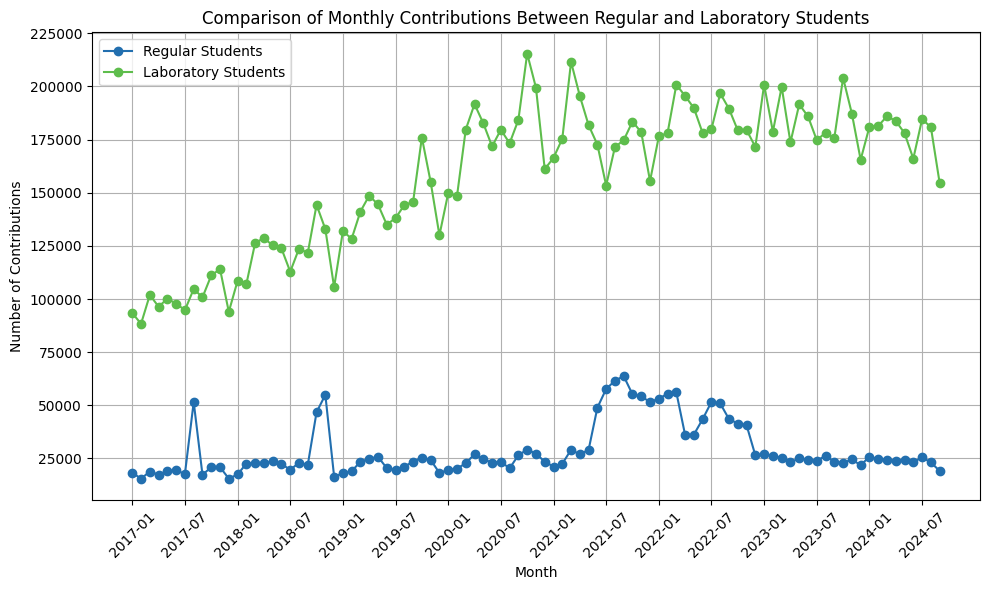

<Figure size 640x480 with 0 Axes>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import json

def safe_convert_to_dict(item):
    if isinstance(item, str):
        return json.loads(item.replace("'", '"'))
    return item

def prepare_monthly_data(df, column):
    df[column] = df[column].apply(safe_convert_to_dict)
    monthly_data = pd.DataFrame(df[column].tolist())
    monthly_totals = monthly_data.sum().sort_index()  
    return monthly_totals

lappis_monthly = prepare_monthly_data(lappis_data, 'monthly_contributions')
eps_monthly = prepare_monthly_data(eps_data, 'monthly_contributions')

plt.figure(figsize=(10, 6))
plt.plot(lappis_monthly.index, lappis_monthly.values, marker='o', linestyle='-', color='#226FAF', label='Regular Students')
plt.plot(eps_monthly.index, eps_monthly.values, marker='o', linestyle='-', color='#5EBD4C', label='Laboratory Students')

plt.title('Comparison of Monthly Contributions Between Regular and Laboratory Students')
plt.xlabel('Month')
plt.ylabel('Number of Contributions')
plt.xticks(ticks=range(0, len(lappis_monthly), 6), labels=lappis_monthly.index[::6], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.savefig('monthly_comparison.png', format='png')


In [35]:
import pandas as pd

def analyze_monthly_contributions(df):
    monthly_data = df['monthly_contributions'].apply(pd.Series)
    
    monthly_stats = monthly_data.describe().loc[['mean', '50%', 'std']]
    
    max_contributions = monthly_data.max()
    min_contributions = monthly_data.min()
    
    monthly_data.columns = pd.to_datetime(monthly_data.columns, format='%Y-%m')
    yearly_sum = monthly_data.resample('Y', axis=1).sum().sum(axis=0)
    
    return monthly_stats, max_contributions, min_contributions, yearly_sum

monthly_stats, max_contributions, min_contributions, yearly_sum = analyze_monthly_contributions(lappis_normalized)
print("Monthly Stats:\n", monthly_stats)
print("Max Contributions by Month:\n", max_contributions)
print("Min Contributions by Month:\n", min_contributions)
print("Yearly Sum of Contributions:\n", yearly_sum)


Monthly Stats:
         2017-01    2017-02    2017-03    2017-04    2017-05    2017-06  \
mean   9.560372   7.712074  11.280186  11.801858  11.342105  11.704334   
50%    0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
std   32.807617  23.015211  38.774128  37.141060  27.572354  31.845035   

        2017-07    2017-08    2017-09    2017-10  ...    2024-03    2024-04  \
mean  10.122291  11.445820  10.760062  13.075851  ...  17.856037  18.445820   
50%    0.000000   0.000000   0.000000   0.000000  ...   0.000000   0.000000   
std   34.004089  42.293101  29.109784  31.039742  ...  58.796293  43.210995   

        2024-05    2024-06    2024-07    2024-08    2024-09  2024-10  2024-11  \
mean  17.586687  16.854489  20.414861  18.312693  14.653251      0.0      0.0   
50%    0.000000   0.000000   0.000000   0.000000   0.000000      0.0      0.0   
std   39.731085  39.407557  55.619260  42.292793  33.457559      0.0      0.0   

      2024-12  
mean      0.0  
50%       0.0

/tmp/ipykernel_2446760/3097582270.py:18: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  yearly_sum = monthly_data.resample('Y', axis=1).sum().sum(axis=0)
/tmp/ipykernel_2446760/3097582270.py:18: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_sum = monthly_data.resample('Y', axis=1).sum().sum(axis=0)
